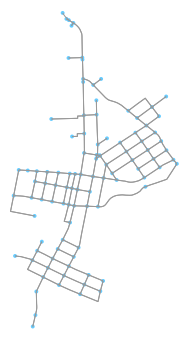

(<Figure size 223.189x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda0f375630>)

In [8]:
import osmnx as ox
import networkx as nx
town = ox.graph_from_place('Wind Gap, Pennsylvania, USA', network_type='drive')
town_nodes = town.nodes()
ox.plot_graph(ox.project_graph(town))
# here is the intial town


In [12]:
# we want more than the town though, because we care about cutting it off from the outside, so we need to know about the outside. 
# so for each intersection in the town, get it's connections (within a distance) and merge these into a new graph
# new graph
G = None
for n in town.nodes():
    for nbr in nx.neighbors(town, n):
        for d in town.get_edge_data(n, nbr).values():
            print(d['name'])
            g = ox.graph_from_address(d['name'])
            if G is None:
                G = g
            else:
                G = nx.compose(G, g)
                
ox.plot_graph(ox.project_graph(G))

Liberty Street
Mechanic Street
Mechanic Street
Broadway (Old Route 115)
Broadway (Old Route 115)
Genoga Avenue
East Center Street
East Center Street
South Lehigh Avenue
South Lehigh Avenue
East 5th Street
Broadway (Old Route 115)
10th Street
Broadway (Old Route 115)
North Lehigh Avenue
North Lehigh Avenue
North Lehigh Avenue
Park Avenue
Park Avenue
North Lehigh Avenue
Washington Street
Washington Street
West 3rd Street
Washington Street
West 2nd Street
West 2nd Street
['West 1st Street', 'Washington Street']


Exception: Nominatim geocoder returned no results for query "['West 1st Street', 'Washington Street']"

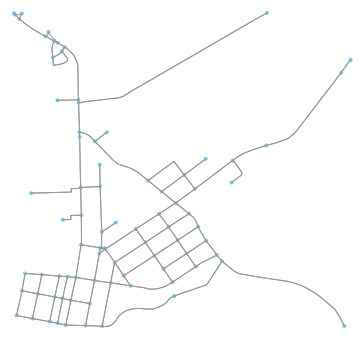

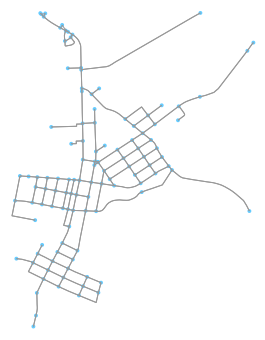

(<Figure size 323.92x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39c68dea90>)

In [13]:

for node in town.nodes():
    print(town[node])

{259333019: {0: {'osmid': 23929576, 'oneway': False, 'highway': 'residential', 'name': 'Liberty Street', 'length': 157.304}}}
{259338176: {0: {'osmid': 23934846, 'oneway': False, 'highway': 'residential', 'name': 'Mechanic Street', 'length': 111.519}}, 1502370809: {0: {'osmid': 23934846, 'oneway': False, 'highway': 'residential', 'name': 'Mechanic Street', 'length': 49.139}}, 31273717: {0: {'name': 'Broadway (Old Route 115)', 'highway': 'primary', 'osmid': 136952079, 'lanes': '2', 'ref': 'PA 512', 'oneway': False, 'length': 139.55}}, 259294501: {0: {'name': 'Broadway (Old Route 115)', 'highway': 'primary', 'osmid': 136952079, 'lanes': '2', 'ref': 'PA 512', 'oneway': False, 'length': 150.207}}}
{259260760: {0: {'osmid': 23927823, 'oneway': False, 'highway': 'residential', 'name': 'Genoga Avenue', 'length': 95.546}}, 259279219: {0: {'name': 'East Center Street', 'highway': 'residential', 'osmid': 23933064, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f39c6e31a90>, 'on